### Analysis of MCU Box Office Performance

Importing relavent packages

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv('mcu_box_office.csv')

Dispay the first 10 rows

In [146]:
df.head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/08,94,91,126,"$186,000,000.00","$102,118,668.00","$318,604,126.00","$585,171,547.00"
1,The Incredible Hulk,1,6/13/08,67,70,112,"$137,500,000.00","$55,414,050.00","$134,806,913.00","$265,573,859.00"
2,Iron Man 2,1,5/7/10,72,71,124,"$170,000,000.00","$128,122,480.00","$312,433,331.00","$621,156,389.00"
3,Thor,1,5/6/11,77,76,113,"$150,000,000.00","$65,723,338.00","$181,030,624.00","$449,326,618.00"
4,Captain America: The First Avenger,1,7/22/11,79,75,124,"$140,000,000.00","$65,058,524.00","$176,654,505.00","$370,569,776.00"
5,The Avengers,1,5/4/12,91,91,143,"$225,000,000.00","$207,438,708.00","$623,357,910.00","$1,515,100,211.00"
6,Iron Man 3,2,5/3/13,79,78,130,"$200,000,000.00","$174,144,585.00","$408,992,272.00","$1,215,392,272.00"
7,Thor: The Dark World,2,11/8/13,66,75,111,"$150,000,000.00","$85,737,841.00","$206,362,140.00","$644,602,516.00"
8,Captain America: The Winter Soldier,2,4/4/14,90,92,135,"$170,000,000.00","$95,023,721.00","$259,746,958.00","$714,401,889.00"
9,Guardians of the Galaxy,2,8/1/14,92,92,121,"$170,000,000.00","$94,320,883.00","$333,714,112.00","$770,882,395.00"


Display the last 10 rows

In [147]:
df.tail(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
17,Black Panther,3,2/16/18,96,79,134,"$200,000,000.00","$202,003,951.00","$700,059,566.00","$1,336,494,321.00"
18,Avengers: Infinity War,3,4/27/18,85,91,149,"$300,000,000.00","$257,698,183.00","$678,815,482.00","$2,048,359,754.00"
19,Ant-Man and the Wasp,3,7/6/18,87,81,118,"$130,000,000.00","$75,812,205.00","$216,648,740.00","$623,144,660.00"
20,Captain Marvel,3,3/8/19,79,45,124,"$175,000,000.00","$153,433,423.00","$426,829,839.00","$1,129,727,388.00"
21,Avengers: End Game,3,4/26/19,94,90,181,"$400,000,000.00","$357,115,007.00","$858,373,000.00","$2,797,800,564.00"
22,Spider-Man: Far From Home,3,7/2/19,90,95,129,"$160,000,000.00","$92,579,212.00","$390,532,085.00","$1,132,532,832.00"
23,Black Widow,4,7/9/21,79,91,133,"$200,000,000.00","$80,366,312.00","$183,651,655.00","$379,751,655.00"
24,Shang-Chi and the Legend of the Ten Rings,4,9/3/21,91,98,133,"$150,000,000.00","$75,388,688.00","$224,543,292.00","$432,243,292.00"
25,Eternals,4,11/5/21,47,78,157,"$200,000,000.00","$71,297,219.00","$164,870,264.00","$402,064,929.00"
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,"$200,000,000.00","$260,138,569.00","$803,975,784.00","$1,891,108,035.00"


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


Check for null values or duplicates

In [149]:
print("Missing values:",df.isnull().values.any())

Missing values: False


In [150]:
print("Duplicate values:", df.duplicated().any())

Duplicate values: False


General Information about the dataset

In [151]:
df.describe()

,mcu_phase,tomato_meter,audience_score,movie_duration
count,27.000000,27.000000,27.000000,27.000000
mean,2.481481,83.555556,83.740741,131.925926
std,1.014145,11.112479,11.002072,15.531422
min,1.000000,47.000000,45.000000,111.000000
25%,2.000000,79.000000,78.000000,122.500000
50%,3.000000,87.000000,87.000000,130.000000
75%,3.000000,91.500000,91.000000,138.000000
max,4.000000,96.000000,98.000000,181.000000


In [152]:
df.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

Top 10 Performers at Domestic Box Office

In [170]:
df.sort_values('domestic_box_office', ascending=False).head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
21,Avengers: End Game,3,4/26/19,94,90,181,"$400,000,000.00","$357,115,007.00","$858,373,000.00","$2,797,800,564.00"
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,"$200,000,000.00","$260,138,569.00","$803,975,784.00","$1,891,108,035.00"
17,Black Panther,3,2/16/18,96,79,134,"$200,000,000.00","$202,003,951.00","$700,059,566.00","$1,336,494,321.00"
18,Avengers: Infinity War,3,4/27/18,85,91,149,"$300,000,000.00","$257,698,183.00","$678,815,482.00","$2,048,359,754.00"
5,The Avengers,1,5/4/12,91,91,143,"$225,000,000.00","$207,438,708.00","$623,357,910.00","$1,515,100,211.00"
10,Avengers: Age of Ultron,2,5/1/15,76,83,141,"$365,000,000.00","$191,271,109.00","$459,005,868.00","$1,395,316,979.00"
20,Captain Marvel,3,3/8/19,79,45,124,"$175,000,000.00","$153,433,423.00","$426,829,839.00","$1,129,727,388.00"
6,Iron Man 3,2,5/3/13,79,78,130,"$200,000,000.00","$174,144,585.00","$408,992,272.00","$1,215,392,272.00"
12,Captain America: Civil War,3,5/6/16,90,89,146,"$250,000,000.00","$179,139,142.00","$408,084,349.00","$1,151,918,521.00"
22,Spider-Man: Far From Home,3,7/2/19,90,95,129,"$160,000,000.00","$92,579,212.00","$390,532,085.00","$1,132,532,832.00"


Duration of the film

In [159]:
df.sort_values('movie_duration', ascending=False).head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
21,Avengers: End Game,3,4/26/19,94,90,181,"$400,000,000.00","$357,115,007.00","$858,373,000.00","$2,797,800,564.00"
25,Eternals,4,11/5/21,47,78,157,"$200,000,000.00","$71,297,219.00","$164,870,264.00","$402,064,929.00"
18,Avengers: Infinity War,3,4/27/18,85,91,149,"$300,000,000.00","$257,698,183.00","$678,815,482.00","$2,048,359,754.00"
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,"$200,000,000.00","$260,138,569.00","$803,975,784.00","$1,891,108,035.00"
12,Captain America: Civil War,3,5/6/16,90,89,146,"$250,000,000.00","$179,139,142.00","$408,084,349.00","$1,151,918,521.00"
5,The Avengers,1,5/4/12,91,91,143,"$225,000,000.00","$207,438,708.00","$623,357,910.00","$1,515,100,211.00"
10,Avengers: Age of Ultron,2,5/1/15,76,83,141,"$365,000,000.00","$191,271,109.00","$459,005,868.00","$1,395,316,979.00"
8,Captain America: The Winter Soldier,2,4/4/14,90,92,135,"$170,000,000.00","$95,023,721.00","$259,746,958.00","$714,401,889.00"
14,Guardians of the Galaxy Vol. 2,3,5/5/17,85,87,135,"$200,000,000.00","$146,510,104.00","$389,813,101.00","$869,113,101.00"
17,Black Panther,3,2/16/18,96,79,134,"$200,000,000.00","$202,003,951.00","$700,059,566.00","$1,336,494,321.00"


Biggest Budgets

In [172]:
df.sort_values('production_budget', ascending=False).head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
21,Avengers: End Game,3,4/26/19,94,90,181,"$400,000,000.00","$357,115,007.00","$858,373,000.00","$2,797,800,564.00"
10,Avengers: Age of Ultron,2,5/1/15,76,83,141,"$365,000,000.00","$191,271,109.00","$459,005,868.00","$1,395,316,979.00"
18,Avengers: Infinity War,3,4/27/18,85,91,149,"$300,000,000.00","$257,698,183.00","$678,815,482.00","$2,048,359,754.00"
12,Captain America: Civil War,3,5/6/16,90,89,146,"$250,000,000.00","$179,139,142.00","$408,084,349.00","$1,151,918,521.00"
5,The Avengers,1,5/4/12,91,91,143,"$225,000,000.00","$207,438,708.00","$623,357,910.00","$1,515,100,211.00"
25,Eternals,4,11/5/21,47,78,157,"$200,000,000.00","$71,297,219.00","$164,870,264.00","$402,064,929.00"
6,Iron Man 3,2,5/3/13,79,78,130,"$200,000,000.00","$174,144,585.00","$408,992,272.00","$1,215,392,272.00"
17,Black Panther,3,2/16/18,96,79,134,"$200,000,000.00","$202,003,951.00","$700,059,566.00","$1,336,494,321.00"
26,Spider-Man: No Way Home,4,12/17/21,93,98,148,"$200,000,000.00","$260,138,569.00","$803,975,784.00","$1,891,108,035.00"
14,Guardians of the Galaxy Vol. 2,3,5/5/17,85,87,135,"$200,000,000.00","$146,510,104.00","$389,813,101.00","$869,113,101.00"


Does the phase matter?

In [175]:
df.groupby('mcu_phase')['audience_score'].mean().sort_values(ascending=False)

mcu_phase
4    91.250000
2    84.166667
3    83.363636
1    79.000000
Name: audience_score, dtype: float64

<Axes: xlabel='mcu_phase', ylabel='audience_score'>

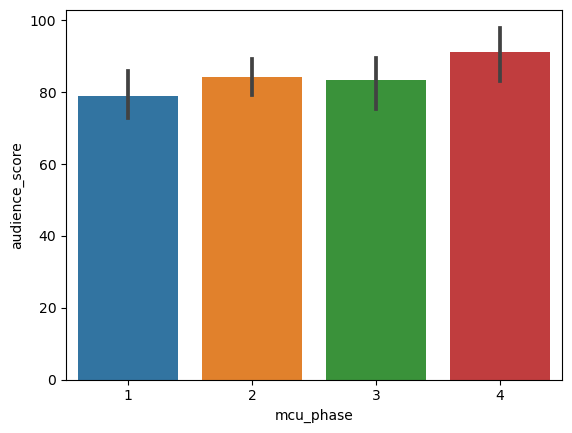

In [176]:
sns.barplot(df, x='mcu_phase', y='audience_score') 


Rotten Tomatoes vs Audience scores

Seasonal Trends?